# Import Section

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# Check Data

In [2]:
# Load the dataset
file_path = 'HW3-data.csv' # Fill in the file path
data = pd.read_csv(file_path)
data

,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Checking for missing values
missing_values = data.isnull().sum()
data_cleaned = data.drop(['ID'], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['Diagnosis'] = label_encoder.fit_transform(data_cleaned['Diagnosis'])
data_cleaned

,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Standardization

In [4]:
scaler = StandardScaler()
X = data_cleaned.drop('Diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)

# Correlation Analysis

In [5]:
column_names = X.columns
X_scaled = pd.DataFrame(X_scaled, columns=column_names)
corr_matrix = X_scaled.corr()

# Initialize a list to hold pairs of highly correlated features
high_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            col_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(col_pair)

# Print out the pairs with high correlation
for pair in high_corr_pairs:
    print(f"Pair: {pair[0]}, {pair[1]} - Correlation: {pair[2]}")


Pair: PerimeterM, RadiusM - Correlation: 0.9978552814938096
Pair: AreaM, RadiusM - Correlation: 0.9873571700566122
Pair: AreaM, PerimeterM - Correlation: 0.9865068039913902
Pair: PerimeterSE, RadiusSE - Correlation: 0.9727936770160753
Pair: AreaSE, RadiusSE - Correlation: 0.9518301121109909
Pair: RadiusW, RadiusM - Correlation: 0.9695389726112066
Pair: RadiusW, PerimeterM - Correlation: 0.9694763634663137
Pair: RadiusW, AreaM - Correlation: 0.9627460860470832
Pair: PerimeterW, RadiusM - Correlation: 0.9651365139559874
Pair: PerimeterW, PerimeterM - Correlation: 0.9703868870426386
Pair: PerimeterW, AreaM - Correlation: 0.9591195743552646
Pair: PerimeterW, RadiusW - Correlation: 0.9937079161029492
Pair: AreaW, AreaM - Correlation: 0.9592133256499006
Pair: AreaW, RadiusW - Correlation: 0.9840145644590723
Pair: AreaW, PerimeterW - Correlation: 0.9775780914063872


In [6]:
X_scaled = X_scaled.drop(['RadiusM', 'AreaM' ,'PerimeterSE' ,'AreaSE' ,'RadiusW'
                          ,'PerimeterW' ,'AreaW'], axis=1)
X_scaled

,TextureM,PerimeterM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,FdimensionM,RadiusSE,TextureSE,...,ConcavePointsSE,SymmetrySE,FdimensionSE,TextureW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,-2.073335,1.269934,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,0.660820,1.148757,0.907083,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.685955,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,0.260162,-0.805450,-0.099444,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.566503,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,1.424827,0.237036,0.293559,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.592687,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,1.115007,4.732680,2.047511,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.776573,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,1.144205,-0.361092,0.499328,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.060786,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,2.067178,-1.138416,0.167980,0.117700,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.615931,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,0.808431,-0.189161,-0.490556,2.047399,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.672676,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,0.612157,-0.891416,0.036727,1.374854,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.982524,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.785721,0.326634,0.904057,2.237926,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
X_scaled.shape

(569, 23)

# Logistic Regression

In [8]:
# Splitting
X = X_scaled
y = data_cleaned['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
data_cleaned['Diagnosis'].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

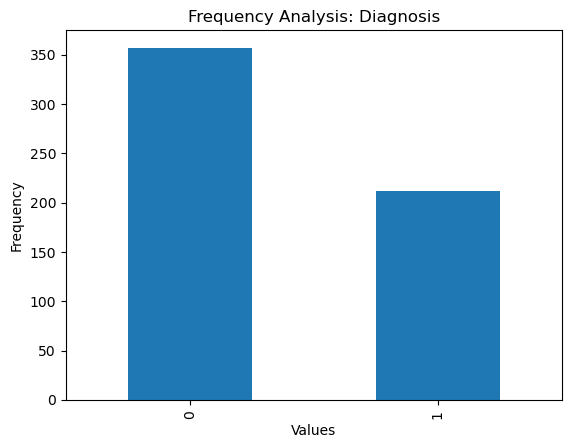

In [9]:
columns_of_interest = ['Diagnosis']

for column in columns_of_interest:
    frequency = data_cleaned[column].value_counts()
    
    frequency.plot(kind='bar')
    plt.title(f"Frequency Analysis: {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

In [10]:
np.mean(y)

0.37258347978910367

## OOP - Imbalanced Model

In [97]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, normalize=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.normalize = normalize
        self.mean = None
        self.std = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
            if self.normalize:
                X = self._normalize(X)

            num_samples, num_features = X.shape
            self.weights = np.zeros(num_features)
            self.bias = 0

            # Gradient descent
            for epoch in range(self.epochs):
                print(f"\rEpoch {epoch+1}/{self.epochs} - ", end="", flush=True)
                linear_model = np.dot(X, self.weights) + self.bias
                predictions = self.sigmoid(linear_model)

                # Compute gradients
                dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
                db = (1 / num_samples) * np.sum(predictions - y)

                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                if (epoch + 1) % 100 == 0 or epoch == 0 or epoch == self.epochs - 1:
                    self.evaluate(X, y)
                
    # Normalization
    def _normalize(self, X):
        if self.mean is None or self.std is None:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
        return (X - self.mean) / (self.std + 1e-10)  # added epsilon to avoid division by zero

    # Label prediction
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        class_predictions = [1 if i > 0.5 else 0 for i in y_pred]
        return class_predictions
    
    # Probability prediction
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    # Evaluation for training or testing dataset (requires knowing y_test)
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)  # Labels
        accuracy = np.mean(y_pred == y_test)
        print(f'Model Accuracy: {accuracy * 100:.2f}%')
        return accuracy

    def plot_roc_curve(self, X, y_true):
        """
        Plot ROC curve.

        X: The input features
        y_true: True labels
        """
        
        if self.normalize:
            X = self._normalize(X)
        
        # Assuming predict_proba is a method in your class that predicts the probability 
        # of the positive class
        y_score = self.predict_proba(X) 

        thresholds = np.linspace(1, 0, 100)
        tpr = []  # True Positive Rate
        fpr = []  # False Positive Rate

        for thresh in thresholds:
            y_pred = (y_score > thresh).astype(int)
            tp = np.sum((y_pred == 1) & (y_true == 1))
            fp = np.sum((y_pred == 1) & (y_true == 0))
            fn = np.sum((y_pred == 0) & (y_true == 1))
            tn = np.sum((y_pred == 0) & (y_true == 0))
            
            tpr.append(tp / (tp + fn))
            fpr.append(fp / (fp + tn))
        
        # Calculating AUC using the trapezoidal rule
        auc = np.trapz(tpr, x=fpr)
        
        # Plotting the ROC curve
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.5f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    def significant_vars(self, threshold):
        significant_indices = np.where(abs(self.weights) >= threshold)[0]
        print(f'Significant variables (index): {significant_indices}')
        return significant_indices

### Training

In [98]:
custom_logreg = LogisticRegression(learning_rate=0.01, epochs=1000, normalize=False)
custom_logreg.fit(X_train, y_train)

Epoch 1/1000 - Model Accuracy: 89.45%
Epoch 100/1000 - Model Accuracy: 92.21%
Epoch 200/1000 - Model Accuracy: 93.72%
Epoch 300/1000 - Model Accuracy: 95.23%
Epoch 400/1000 - Model Accuracy: 95.98%
Epoch 500/1000 - Model Accuracy: 96.23%
Epoch 600/1000 - Model Accuracy: 96.23%
Epoch 700/1000 - Model Accuracy: 96.23%
Epoch 800/1000 - Model Accuracy: 96.73%
Epoch 900/1000 - Model Accuracy: 96.73%
Epoch 1000/1000 - Model Accuracy: 96.73%


### ROC Curve

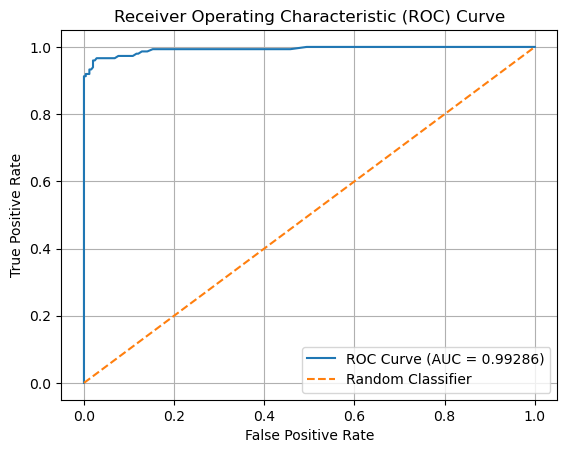

In [99]:
custom_logreg.plot_roc_curve(X_train,y_train)

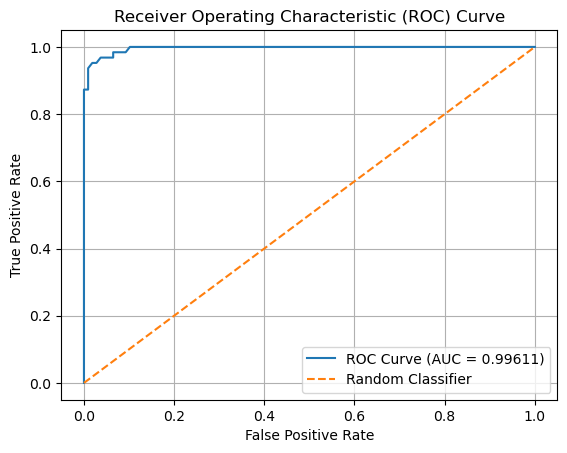

In [100]:
custom_logreg.plot_roc_curve(X_test,y_test)

### Confusion Matrix

In [106]:
def confusion_matrix(true_labels, predicted_labels, classes):
    """
    Calculate and plot the confusion matrix.

    true_labels: Actual labels
    predicted_labels: Predicted labels
    classes: List of unique class labels
    """
    num_classes = len(classes)
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true, pred in zip(true_labels, predicted_labels):
        cm[true, pred] += 1
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

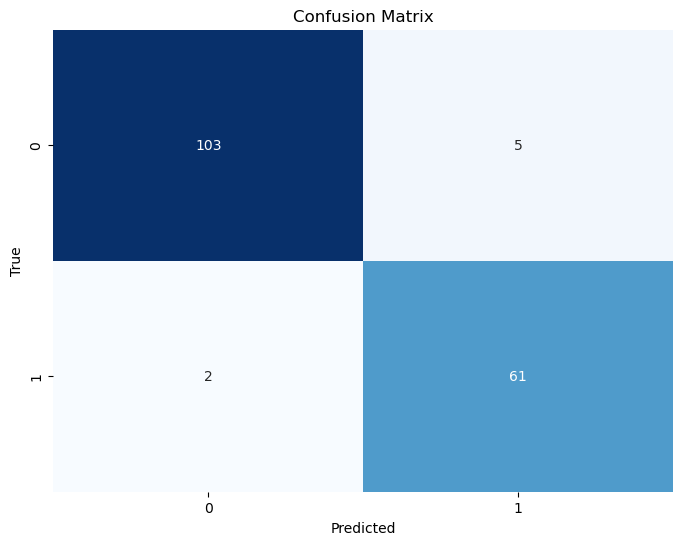

In [101]:
y_pred_test = custom_logreg.predict(X_test)  # Use predict to get class labels

labels = [0, 1]
confusion_matrix(y_test, y_pred_test, labels)

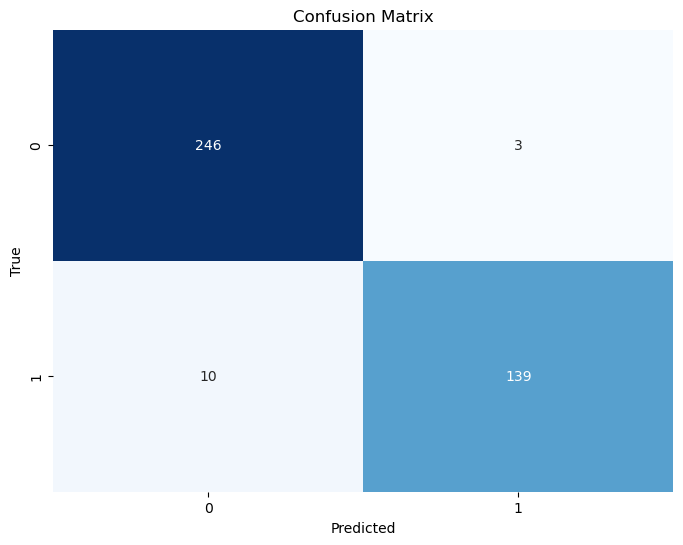

In [102]:
y_pred_train = custom_logreg.predict(X_train)  # Use predict to get class labels

labels = [0, 1]
confusion_matrix(y_train, y_pred_train, labels)


### S Curve

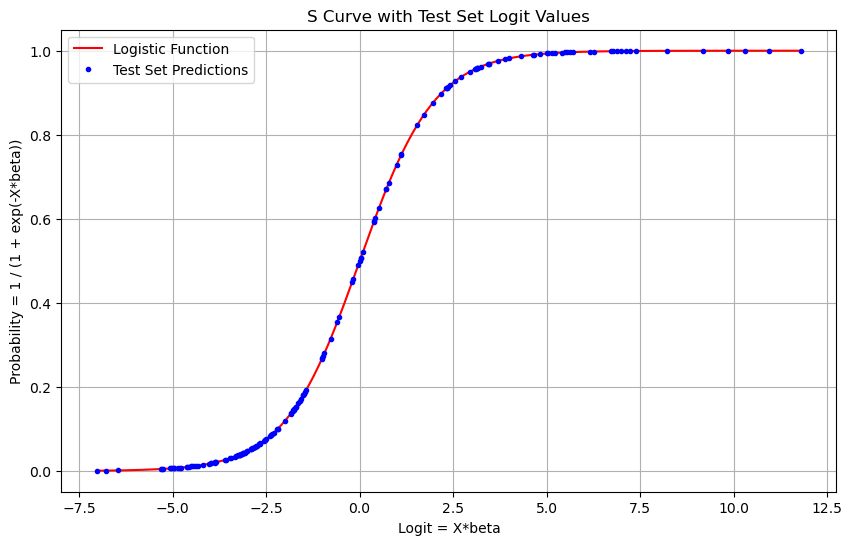

In [103]:
y_pred_proba_testing = custom_logreg.predict_proba(X_test)

# Calculate logit values for the test set
logit_values_custom = np.dot(X_test, custom_logreg.weights) + custom_logreg.bias

# Now you can plot
Y_spread = np.linspace(min(logit_values_custom), max(logit_values_custom), 300)
plt.figure(figsize=(10, 6))
plt.plot(Y_spread, 1 / (1 + np.exp(-Y_spread)), 'r', label='Logistic Function')
plt.plot(logit_values_custom, y_pred_proba_testing, 'b.', label='Test Set Predictions')

plt.xlabel('Logit = X*beta')
plt.ylabel('Probability = 1 / (1 + exp(-X*beta))')
plt.title('S Curve with Test Set Logit Values')
plt.legend()
plt.grid(True)
plt.show()


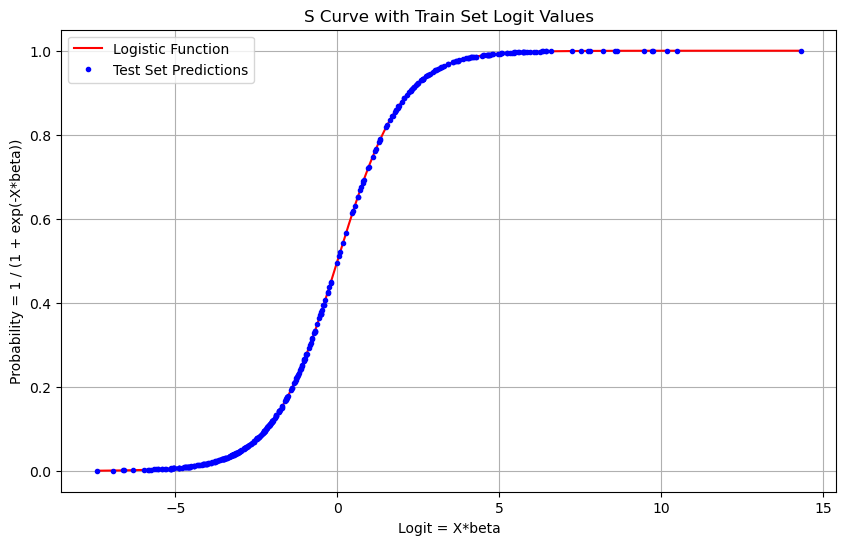

In [104]:
y_pred_proba_training = custom_logreg.predict_proba(X_train)

# Calculate logit values for the test set
logit_values_custom = np.dot(X_train, custom_logreg.weights) + custom_logreg.bias

# Now you can plot
Y_spread = np.linspace(min(logit_values_custom), max(logit_values_custom), 300)
plt.figure(figsize=(10, 6))
plt.plot(Y_spread, 1 / (1 + np.exp(-Y_spread)), 'r', label='Logistic Function')
plt.plot(logit_values_custom, y_pred_proba_training, 'b.', label='Test Set Predictions')

plt.xlabel('Logit = X*beta')
plt.ylabel('Probability = 1 / (1 + exp(-X*beta))')
plt.title('S Curve with Train Set Logit Values')
plt.legend()
plt.grid(True)
plt.show()


## OOP - Balanced Model

In [108]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, normalize=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.normalize = normalize
        self.mean = None
        self.std = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        if self.normalize:
            X = self._normalize(X)

        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Calculate class weights
        total_samples = num_samples
        num_class_0 = np.sum(y == 0)
        num_class_1 = np.sum(y == 1)
        weight_0 = total_samples / (2 * num_class_0)
        weight_1 = total_samples / (2 * num_class_1)

        # Gradient descent
        for epoch in range(self.epochs):
            print(f"\rEpoch {epoch+1}/{self.epochs} - ", end="", flush=True)
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients with class weights
            errors = predictions - y
            dw = (1 / num_samples) * (np.dot(X.T, errors * (y * weight_1 + (1 - y) * weight_0)))
            db = (1 / num_samples) * np.sum(errors * (y * weight_1 + (1 - y) * weight_0))

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if (epoch + 1) % 100 == 0 or epoch == 0 or epoch == self.epochs - 1:
                self.evaluate(X, y)

                
    # Normalization
    def _normalize(self, X):
        if self.mean is None or self.std is None:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
        return (X - self.mean) / (self.std + 1e-10)  # added epsilon to avoid division by zero

    # Label prediction
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        class_predictions = [1 if i > 0.5 else 0 for i in y_pred]
        return class_predictions
    
    # Probability prediction
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    # Evaluation for training or testing dataset (requires knowing y_test)
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)  # Labels
        accuracy = np.mean(y_pred == y_test)
        print(f'Model Accuracy: {accuracy * 100:.2f}%')
        return accuracy

    def plot_roc_curve(self, X, y_true):
        """
        Plot ROC curve.

        X: The input features
        y_true: True labels
        """
        
        if self.normalize:
            X = self._normalize(X)
        
        # Assuming predict_proba is a method in your class that predicts the probability 
        # of the positive class
        y_score = self.predict_proba(X) 

        thresholds = np.linspace(1, 0, 100)
        tpr = []  # True Positive Rate
        fpr = []  # False Positive Rate

        for thresh in thresholds:
            y_pred = (y_score > thresh).astype(int)
            tp = np.sum((y_pred == 1) & (y_true == 1))
            fp = np.sum((y_pred == 1) & (y_true == 0))
            fn = np.sum((y_pred == 0) & (y_true == 1))
            tn = np.sum((y_pred == 0) & (y_true == 0))
            
            tpr.append(tp / (tp + fn))
            fpr.append(fp / (fp + tn))
        
        # Calculating AUC using the trapezoidal rule
        auc = np.trapz(tpr, x=fpr)
        
        # Plotting the ROC curve
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.5f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    def significant_vars(self, threshold):
        significant_indices = np.where(abs(self.weights) >= threshold)[0]
        print(f'Significant variables (index): {significant_indices}')
        return significant_indices

## Training

In [109]:
custom_logreg = LogisticRegression(learning_rate=0.01, epochs=1000, normalize=False)
custom_logreg.fit(X_train, y_train)

Epoch 1/1000 - Model Accuracy: 88.94%
Epoch 100/1000 - Model Accuracy: 92.21%
Epoch 200/1000 - Model Accuracy: 92.71%
Epoch 300/1000 - Model Accuracy: 94.22%
Epoch 400/1000 - Model Accuracy: 95.48%
Epoch 500/1000 - Model Accuracy: 95.98%
Epoch 600/1000 - Model Accuracy: 96.48%
Epoch 700/1000 - Model Accuracy: 96.73%
Epoch 800/1000 - Model Accuracy: 96.98%
Epoch 900/1000 - Model Accuracy: 96.98%
Epoch 1000/1000 - Model Accuracy: 96.98%


### ROC Curve

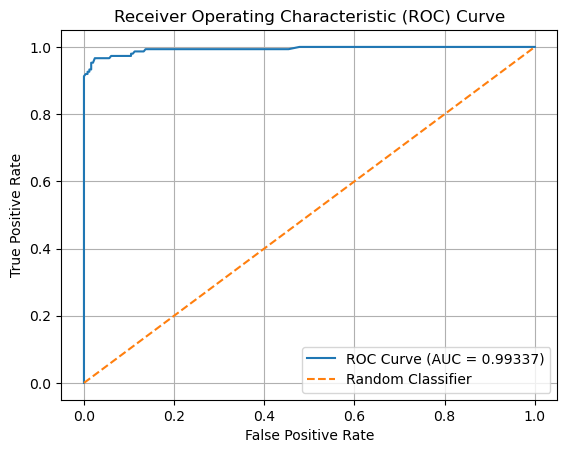

In [110]:
custom_logreg.plot_roc_curve(X_train,y_train)

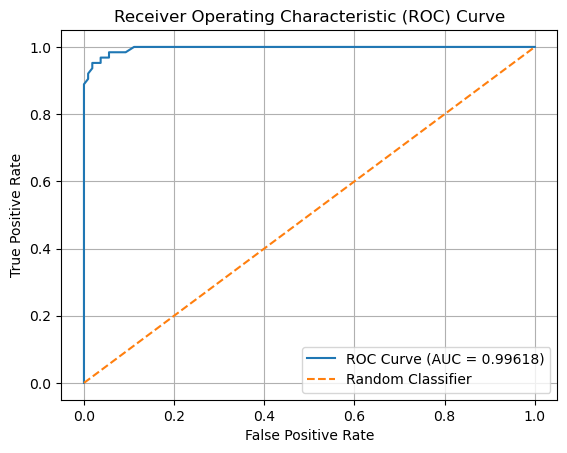

In [111]:
custom_logreg.plot_roc_curve(X_test,y_test)

### Confusion Matrix

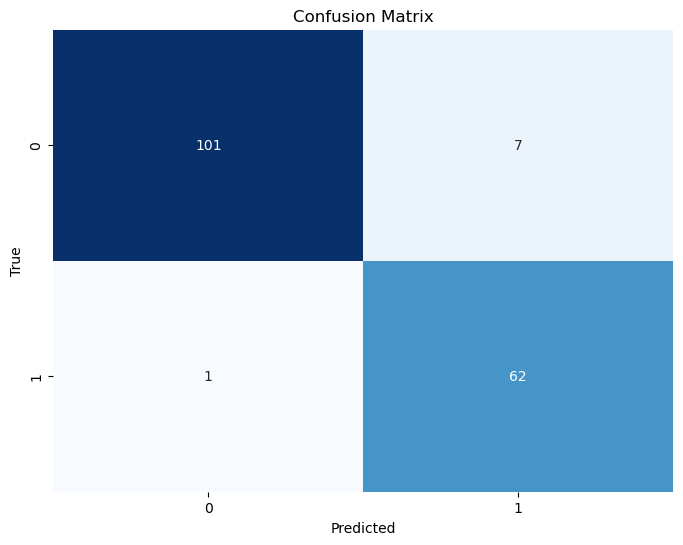

In [112]:
y_pred_test = custom_logreg.predict(X_test)  # Use predict to get class labels

labels = [0, 1]
confusion_matrix(y_test, y_pred_test, labels)


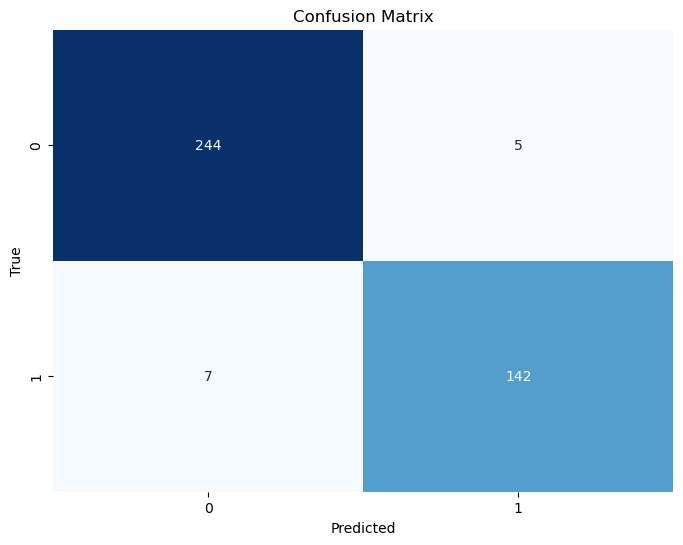

In [113]:
y_pred_train = custom_logreg.predict(X_train)  # Use predict to get class labels

labels = [0, 1]
confusion_matrix(y_train, y_pred_train, labels)


### S Curve

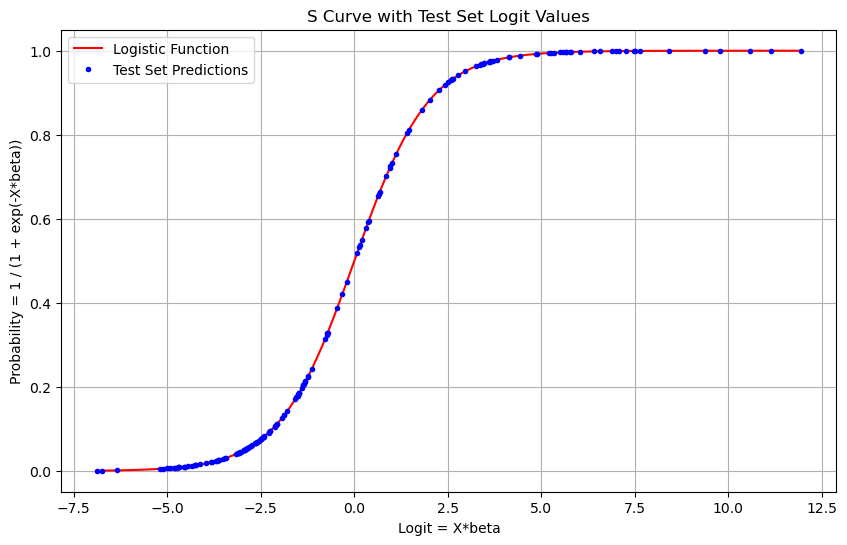

In [114]:
y_pred_proba_testing = custom_logreg.predict_proba(X_test)

# Calculate logit values for the test set
logit_values_custom = np.dot(X_test, custom_logreg.weights) + custom_logreg.bias

# Now you can plot
Y_spread = np.linspace(min(logit_values_custom), max(logit_values_custom), 300)
plt.figure(figsize=(10, 6))
plt.plot(Y_spread, 1 / (1 + np.exp(-Y_spread)), 'r', label='Logistic Function')
plt.plot(logit_values_custom, y_pred_proba_testing, 'b.', label='Test Set Predictions')

plt.xlabel('Logit = X*beta')
plt.ylabel('Probability = 1 / (1 + exp(-X*beta))')
plt.title('S Curve with Test Set Logit Values')
plt.legend()
plt.grid(True)
plt.show()


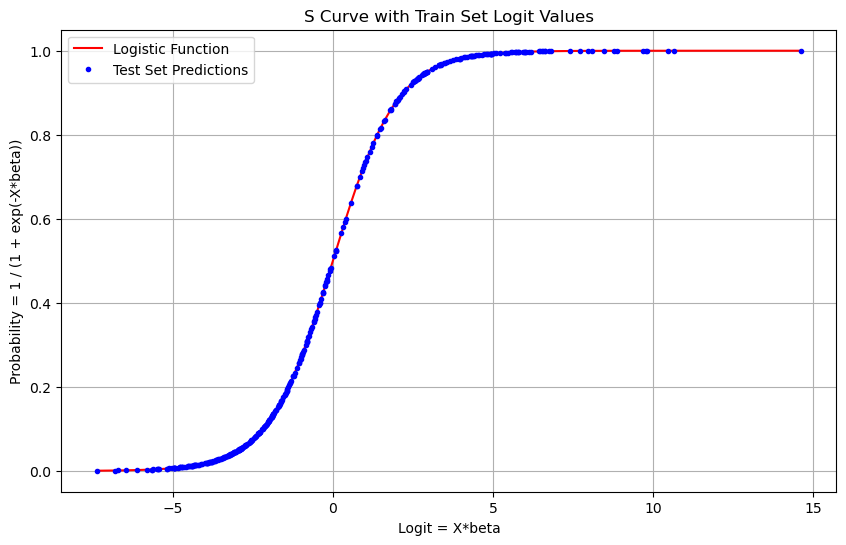

In [115]:
y_pred_proba_training = custom_logreg.predict_proba(X_train)

# Calculate logit values for the test set
logit_values_custom = np.dot(X_train, custom_logreg.weights) + custom_logreg.bias

# Now you can plot
Y_spread = np.linspace(min(logit_values_custom), max(logit_values_custom), 300)
plt.figure(figsize=(10, 6))
plt.plot(Y_spread, 1 / (1 + np.exp(-Y_spread)), 'r', label='Logistic Function')
plt.plot(logit_values_custom, y_pred_proba_training, 'b.', label='Test Set Predictions')

plt.xlabel('Logit = X*beta')
plt.ylabel('Probability = 1 / (1 + exp(-X*beta))')
plt.title('S Curve with Train Set Logit Values')
plt.legend()
plt.grid(True)
plt.show()


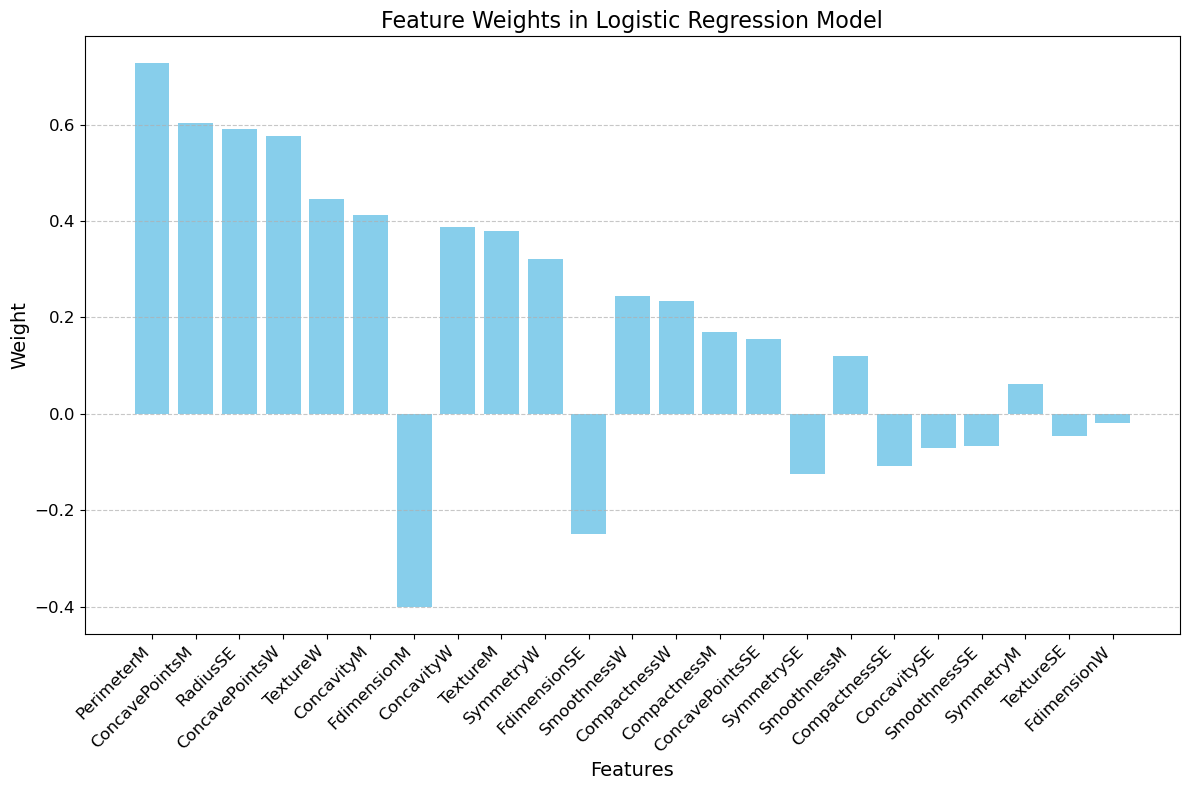

In [116]:
feature_importance = custom_logreg.weights
feature_names = X.columns 

sorted_indices = abs(feature_importance).argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.title('Feature Weights in Logistic Regression Model', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

In [117]:
threshold = 0.1  # Define a threshold for significance
significant_indices = custom_logreg.significant_vars(threshold)

Significant variables (index): [ 0  1  2  3  4  5  7  8 11 13 14 15 16 17 18 19 20 21]
